# **A deep learning project to predict health insurance**

In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model, save_model, Sequential
from keras import layers
from keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Column Transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']),
)

In [ ]:
# X and y
X = df.drop('charges', axis = 1)
y = df['charges']

In [ ]:
# Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
# Fitting Column transformer
ct.fit(X_train)

# Transform Normalised and OneHotEncoded training/test set
X_train_normal = ct.fit_transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Neural Network
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile Model
insurance_model.compile(
    loss = 'mae',
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics= 'mae'
)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit Model
history = insurance_model.fit(X_train_normal,
                    y_train,
                    epochs = 100,
                    batch_size = 32, validation_data = (X_test_normal, y_test), callbacks = [early_stopping] )
history

Epoch 1/100
34/34 [==============================] - 4s 39ms/step - loss: 13324.6641 - mae: 13324.6641 - val_loss: 12885.4307 - val_mae: 12885.4307
Epoch 2/100
34/34 [==============================] - 0s 10ms/step - loss: 12958.6973 - mae: 12958.6973 - val_loss: 11919.5879 - val_mae: 11919.5879
Epoch 3/100
34/34 [==============================] - 0s 14ms/step - loss: 10783.4453 - mae: 10783.4453 - val_loss: 8739.6904 - val_mae: 8739.6904
Epoch 4/100
34/34 [==============================] - 0s 9ms/step - loss: 8126.6597 - mae: 8126.6597 - val_loss: 8281.5518 - val_mae: 8281.5518
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 7794.2954 - mae: 7794.2954 - val_loss: 7909.1719 - val_mae: 7909.1719
Epoch 6/100
34/34 [==============================] - 0s 10ms/step - loss: 7544.9263 - mae: 7544.9263 - val_loss: 7665.8574 - val_mae: 7665.8574
Epoch 7/100
34/34 [==============================] - 0s 13ms/step - loss: 7234.9023 - mae: 7234.9023 - val_loss: 7314.2847 - val

In [ ]:
# Evaluate Model
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3159.4663 - mae: 3159.4663


[3159.46630859375, 3159.46630859375]

In [ ]:
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21501 (83.99 KB)
Trainable params: 21501 (83.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


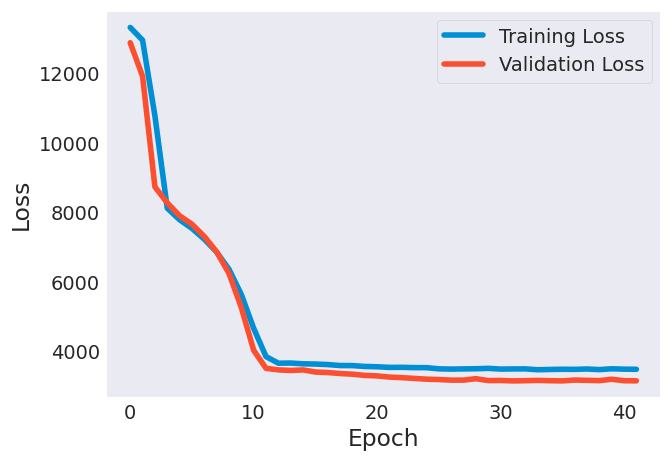

In [ ]:

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Insurance Model 2
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    layers.Dense(100),
    layers.Dense(100),
    layers.Dense(1)
])

insurance_model_2.compile(loss = 'mae',
                          optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                          metrics = ['mae']
                          )

insurance_model_2.fit(X_train_normal,
                      y_train,
                      epochs = 100,
                      batch_size = 32)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 12635.6631 - mae: 12635.6631
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 8111.2207 - mae: 8111.2207
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7079.2896 - mae: 7079.2896
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 5521.6143 - mae: 5521.6143
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 3886.5911 - mae: 3886.5911
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 3657.1506 - mae: 3657.1506
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 3642.0361 - mae: 3642.0361
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 3613.1345 - mae: 3613.1345
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 3572.1777 - mae: 3572.1777
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 3555.4207 - mae: 3555.42

In [ ]:
insurance_model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3158.8416 - mae: 3158.8416


[3158.841552734375, 3158.841552734375]

In [ ]:
insurance_model.save('insurance_model.h5')